In [1]:
import pandas as pd
import numpy as np
from scipy import sparse
from sklearn.preprocessing import normalize
import time
from tqdm.notebook import tqdm
import datetime
import os
import matplotlib.pyplot as plt
from collections import Counter
import seaborn as sns

In [2]:
train_joke_df = pd.read_csv(r'data\recsys-in-practice\train_joke_df.csv')
test_joke_df_nofactrating = pd.read_csv(r'data\recsys-in-practice\test_joke_df_nofactrating.csv',
                                        index_col=0)
sample_submission = pd.read_csv(r'data\recsys-in-practice\sample_submission.csv')

In [3]:
train_joke_df["UID"] = train_joke_df["UID"].astype(int)
train_joke_df["JID"] = train_joke_df["JID"].astype(int)

In [4]:
train_joke_df

,UID,JID,Rating
0,18029,6,-1.26
1,3298,64,-4.17
2,3366,58,0.92
3,12735,92,3.69
4,11365,38,-6.60
...,...,...,...
1448359,22604,26,2.82
1448360,22255,36,-1.94
1448361,21056,40,-9.56
1448362,12328,97,0.87


In [5]:
test_joke_df_nofactrating

,UID,JID
InteractionID,,
0,11228,39
1,21724,85
2,16782,56
3,12105,42
4,14427,2
...,...,...
362086,3085,66
362087,13765,31
362088,10341,29


In [6]:
sample_submission

,InteractionID,Rating
0,0,0.0
1,1,0.0
2,2,0.0
3,3,0.0
4,4,0.0
...,...,...
362086,362086,0.0
362087,362087,0.0
362088,362088,0.0
362089,362089,0.0


In [7]:
users_count = np.unique(test_joke_df_nofactrating["UID"]).size
jokes_count = np.unique(test_joke_df_nofactrating["JID"]).size
users_count, jokes_count

(24983, 100)

In [8]:
users_count = np.unique(train_joke_df["UID"]).size
jokes_count = np.unique(train_joke_df["JID"]).size
users_count, jokes_count

(24983, 100)

In [9]:
#rating = train_joke_df['Rating'].values
#print(np.min(rating), np.max(np.abs(rating)), np.max(np.abs(rating)))

#rating_norm = (rating - np.min(rating)) / (np.max(rating) - np.min(rating))
#rating_norm = rating / np.max(np.abs(rating))
#print(np.min(rating_norm), np.max(rating_norm))

In [10]:
#train_joke_df['Rating_norm'] = rating_norm
#X = np.zeros((users_count, jokes_count))

#for row in tqdm(train_joke_df.values):
#    user_id = int(row[0]) - 1
#    joke_id = int(row[1]) - 1
    
#    rating = row[3]
    
#    X[user_id, joke_id] = rating

In [11]:
from torch.utils.data import DataLoader, Dataset
import torch.nn as nn
import torch

In [12]:
torch.tensor(15)

tensor(15)

In [13]:
class FeaturesDataset(Dataset):
    def __init__(self, df):
        self.df = df
            
    def __getitem__(self, index: int):
        row = self.df.iloc[index]
        x = torch.zeros((users_count + jokes_count), dtype=torch.float, device=device)
        x[int(row.UID) - 1] = 1
        x[int(row.JID) - 1] = 1
        
        return (x, 
        torch.tensor([row.Rating], dtype=torch.float, device=device)
               )
    
    def __len__(self):
        return len(self.df)

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
train_df, test_df = train_test_split(train_joke_df, test_size=0.1, random_state=42)

In [16]:
train_df["UID"] = train_df["UID"].astype(int)
train_df["JID"] = train_df["JID"].astype(int)


test_df["UID"] = test_df["UID"].astype(int)
test_df["JID"] = test_df["JID"].astype(int)

In [17]:
train_df.groupby("UID").count().mean()

JID       52.17656
Rating    52.17656
dtype: float64

In [18]:
test_df.groupby("UID").count().mean()

JID       5.852946
Rating    5.852946
dtype: float64

In [19]:
np.unique(train_df["UID"]).size, np.unique(train_df["JID"]).size

(24983, 100)

In [20]:
np.unique(test_df["UID"]).size, np.unique(test_df["JID"]).size

(24746, 100)

In [21]:
#np.unique(train_df["Rating"])

In [22]:
#np.unique(test_df["Rating"])

In [23]:
sorted(Counter(train_df["Rating"]).items(), key=lambda item: item[1], reverse=True)

[(-0.29, 10383),
 (2.62, 5307),
 (5.73, 5286),
 (-0.39, 5236),
 (-0.49, 5228),
 (2.82, 5205),
 (-0.44, 5203),
 (-0.53, 5141),
 (4.17, 5045),
 (-0.34, 5029),
 (3.2, 5015),
 (3.01, 4914),
 (8.83, 4841),
 (3.16, 4797),
 (2.96, 4792),
 (-0.58, 4776),
 (-0.24, 4756),
 (3.4, 4729),
 (2.43, 4718),
 (2.77, 4689),
 (3.59, 4677),
 (2.23, 4676),
 (1.07, 4673),
 (2.72, 4664),
 (3.11, 4662),
 (3.35, 4645),
 (2.57, 4636),
 (2.91, 4614),
 (1.46, 4612),
 (3.06, 4607),
 (3.25, 4603),
 (2.86, 4587),
 (3.3, 4584),
 (7.28, 4569),
 (2.38, 4561),
 (-0.63, 4552),
 (3.54, 4552),
 (1.26, 4550),
 (3.45, 4517),
 (3.79, 4508),
 (-0.19, 4505),
 (3.64, 4503),
 (3.5, 4496),
 (9.03, 4495),
 (2.67, 4489),
 (2.48, 4476),
 (2.52, 4472),
 (3.83, 4427),
 (1.65, 4424),
 (2.18, 4421),
 (-0.68, 4408),
 (1.84, 4397),
 (2.09, 4395),
 (2.33, 4386),
 (1.99, 4378),
 (3.69, 4377),
 (4.37, 4377),
 (3.98, 4374),
 (1.12, 4363),
 (3.74, 4345),
 (1.94, 4336),
 (1.7, 4335),
 (3.93, 4327),
 (2.04, 4324),
 (2.28, 4316),
 (1.8, 4314),
 (-0

In [24]:
sorted(Counter(test_df["Rating"]).items(), key=lambda item: item[1], reverse=True)

[(-0.29, 1099),
 (2.62, 625),
 (-0.39, 622),
 (-0.53, 596),
 (-0.49, 583),
 (-0.34, 576),
 (8.83, 573),
 (3.2, 572),
 (-0.44, 568),
 (4.17, 567),
 (3.4, 566),
 (3.01, 566),
 (5.73, 561),
 (3.45, 552),
 (2.77, 548),
 (2.57, 544),
 (3.35, 538),
 (1.07, 536),
 (3.5, 536),
 (3.79, 532),
 (1.26, 530),
 (3.25, 528),
 (1.17, 524),
 (2.82, 523),
 (2.96, 521),
 (2.52, 520),
 (2.86, 520),
 (2.43, 518),
 (-0.19, 517),
 (2.38, 515),
 (1.84, 515),
 (-0.68, 512),
 (3.74, 511),
 (2.04, 510),
 (3.64, 510),
 (3.54, 509),
 (-0.58, 509),
 (0.29, 508),
 (1.36, 507),
 (3.83, 502),
 (3.59, 501),
 (3.11, 500),
 (-0.24, 496),
 (2.67, 496),
 (2.48, 496),
 (1.02, 496),
 (3.69, 494),
 (2.18, 493),
 (3.06, 493),
 (2.72, 492),
 (4.76, 492),
 (5.92, 490),
 (1.41, 490),
 (0.68, 487),
 (3.88, 487),
 (2.33, 486),
 (7.28, 486),
 (5.15, 485),
 (1.46, 485),
 (1.21, 485),
 (2.09, 485),
 (1.99, 483),
 (8.88, 483),
 (3.16, 482),
 (2.14, 482),
 (-0.05, 481),
 (4.56, 481),
 (-0.63, 479),
 (0.87, 479),
 (3.93, 478),
 (2.28, 47

C:\ProgramData\Anaconda3\envs\torchvision\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

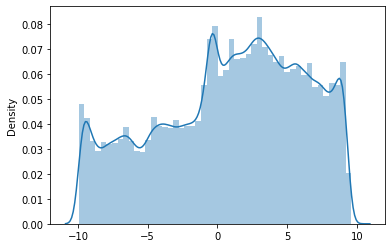

In [25]:
sns.distplot(train_df['Rating'].values)

C:\ProgramData\Anaconda3\envs\torchvision\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

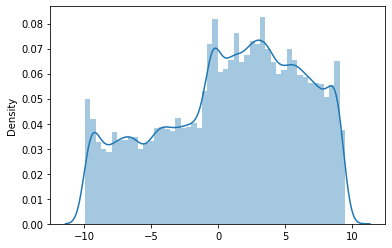

In [26]:
sns.distplot(test_df['Rating'].values)

In [27]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [28]:
#X_train, X_test = train_test_split(X, test_size=0.15, random_state=42)
#X_train.shape, X_test.shape

In [29]:
dataset_train = FeaturesDataset(train_df)
dataset_test = FeaturesDataset(test_df)

In [30]:
dataset_train[0][0].shape

torch.Size([25083])

In [31]:
dataset_train.df.iloc[0].UID

10289.0

In [32]:
import torch

In [33]:
torch.zeros((1))

tensor([0.])

In [34]:
def get_lr(optimizer):
    for param_group in optimizer.param_groups:
        return param_group['lr']


def save(model, name):
    os.mkdir(f"artifacts_nn_regr/{name}")
    #torch.save(model, f"{name}/model.pkl")
    torch.save(model.state_dict(), f"artifacts_nn_regr/{name}/checkpoint.pth")
    
def load(name):
    return torch.load(f"artifacts_nn_regr/{name}/model.pkl")


def load2(name, model):
    model.load_state_dict(torch.load(f"artifacts_nn_regr/{name}/checkpoint.pth"))
    
def train_model(epoch_start, model, train_loader, val_loader, loss, optimizer, num_epochs, scheduler, loss_train_history, loss_val_history):
    best_loss = compute_accuracy(model, val_loader, loss)
    print('loss:', best_loss)
    bet_model_name = None
    for epoch in range(epoch_start, epoch_start + num_epochs):
        t1 = time.time()
        model.train()
        loss_accum = 0
        for i_step, (x, y) in enumerate(tqdm(train_loader)):
            prediction = model(x)    
            loss_value = loss(prediction, y)
            optimizer.zero_grad()   
            loss_value.backward()
            optimizer.step() 
            
                  
            loss_accum += loss_value.cpu().detach().numpy()
            
            
            
        ave_loss = loss_accum / (i_step + 1)
        loss_val = compute_accuracy(model, val_loader, loss)
        
        loss_train_history.append(float(ave_loss))
        loss_val_history.append(loss_val)
        
        if scheduler != None:
            scheduler.step()
        
        if loss_val < best_loss:
            best_loss = loss_val
            bet_model_name = f'{datetime.datetime.now().strftime("%d.%m.%Y_%H.%M.%S.%f")}_epoch_{epoch}_loss_{round(best_loss, 4)}'
            save(model, bet_model_name)
            print(f"saved {bet_model_name}")
            
        print("Epoch: %i lr: %f; Train loss: %f, Val loss: %f, time: %i s" % (epoch, get_lr(optimizer), ave_loss, loss_val,
                                                                            round(time.time() - t1)))
    return bet_model_name
        
    
def compute_accuracy(model, loader, loss):
    """
    Computes accuracy on the dataset wrapped in a loader    
    Returns: accuracy as a float value between 0 and 1
    """
    model.eval()
    loss_accum = 0
    for i_step, (x, y) in enumerate(tqdm(loader)):
        prediction = model(x)
        loss_value = loss(prediction, y)
        loss_accum += loss_value.cpu().detach().numpy()
        
        
    ave_loss = loss_accum / (i_step + 1)         
    return float(ave_loss)

In [35]:
shape = pow(2, 14)
print(shape, shape // 16, shape // 32, shape // 128, shape // 512, shape // 2048)

16384 1024 512 128 32 8


In [36]:
class NNModel(nn.Module):
    def __init__(self, input_shape, seed, ratings_range):
        super().__init__()
        self.seed = torch.manual_seed(seed)
        self.y_range = ratings_range
        
        shape = pow(2, 14) #16384
        self.layer = nn.Sequential(
                nn.Linear(input_shape, shape // 8, dtype=torch.float),
                nn.Dropout(0.66),
                nn.BatchNorm1d(shape // 8, dtype=torch.float),
                nn.ReLU(inplace=True),            
            
                nn.Linear(shape // 8, shape // 64, dtype=torch.float),
                nn.Dropout(0.66),
                nn.BatchNorm1d(shape // 64, dtype=torch.float),
                nn.ReLU(inplace=True),  
            
                nn.Linear(shape // 64, shape // 256, dtype=torch.float),
                nn.Dropout(0.66),
                nn.BatchNorm1d(shape // 256, dtype=torch.float),
                nn.ReLU(inplace=True),  
            
                nn.Linear(shape // 256, shape // 2048, dtype=torch.float),
                nn.Dropout(0.66),
                nn.BatchNorm1d(shape // 2048, dtype=torch.float),
                nn.ReLU(inplace=True),  
            
                nn.Linear(shape // 2048, 1, dtype=torch.float),
                )


    def forward(self, x):
        result = self.layer(x)
        return (result * (self.y_range[1] - self.y_range[0]) + self.y_range[0])
    
    
input_shape = users_count + jokes_count#X_train.shape[1]
display(input_shape)

nn_model = NNModel(input_shape, seed=1024, ratings_range=[-10, 10]).to(device)

print(nn_model)

loss_train_history, loss_val_history = [], []

25083

NNModel(
  (layer): Sequential(
    (0): Linear(in_features=25083, out_features=2048, bias=True)
    (1): Dropout(p=0.66, inplace=False)
    (2): BatchNorm1d(2048, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): ReLU(inplace=True)
    (4): Linear(in_features=2048, out_features=256, bias=True)
    (5): Dropout(p=0.66, inplace=False)
    (6): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): ReLU(inplace=True)
    (8): Linear(in_features=256, out_features=64, bias=True)
    (9): Dropout(p=0.66, inplace=False)
    (10): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (11): ReLU(inplace=True)
    (12): Linear(in_features=64, out_features=8, bias=True)
    (13): Dropout(p=0.66, inplace=False)
    (14): BatchNorm1d(8, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (15): ReLU(inplace=True)
    (16): Linear(in_features=8, out_features=1, bias=True)
  )
)


In [37]:
for x, y in tqdm(DataLoader(dataset_train, batch_size=1000)):
    break
print(x)
print(y)
print(x.shape)
nn_model(x).shape

  0%|          | 0/1304 [00:00<?, ?it/s]

tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]], device='cuda:0')
tensor([[ 8.2500],
        [ 2.4800],
        [-5.9200],
        [-8.9300],
        [-2.0400],
        [-0.4400],
        [ 7.9100],
        [ 4.8500],
        [-6.4100],
        [ 2.1400],
        [ 9.1300],
        [-0.8700],
        [-9.5100],
        [ 2.2300],
        [-7.3300],
        [ 5.6300],
        [ 7.2800],
        [ 4.7100],
        [ 7.2800],
        [ 0.4400],
        [ 4.9500],
        [ 0.5300],
        [-0.2900],
        [-1.8000],
        [ 5.5300],
        [ 1.6500],
        [ 0.2400],
        [ 5.9200],
        [-6.9400],
        [ 8.1100],
        [ 3.7400],
        [ 1.4100],
        [-0.5800],
        [-5.1500],
        [-9.1700],
        [ 5.9200],
        [-9.5600],
        [ 5.6300],
       

torch.Size([1000, 1])

In [38]:
def RMSE_loss(prediction, target):
    return torch.sqrt(nn.MSELoss()(prediction, target))

In [39]:
loss_value = RMSE_loss(nn_model(x), y)
loss_value

tensor(10.4044, device='cuda:0', grad_fn=<SqrtBackward0>)

In [40]:
loss_value.item()

10.404350280761719

In [41]:
1.5 + loss_value.cpu().detach().numpy()

11.904350280761719

In [42]:
#compute_accuracy(nn_model, DataLoader(dataset_test, batch_size=50), RMSE_loss)

In [43]:
loss_train_history

[]

In [44]:
loss_val_history

[]

In [45]:
optimizer = torch.optim.Adam(nn_model.parameters(), lr=1e-3, weight_decay=1e-3)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.9)


bet_model_name = train_model(0,
    nn_model, 
    DataLoader(dataset_train, batch_size=10000),
    DataLoader(dataset_test, batch_size=10000),
    RMSE_loss, optimizer, 100, scheduler, loss_train_history, loss_val_history)
print('end!')
print(bet_model_name)

  0%|          | 0/15 [00:00<?, ?it/s]

loss: 8.21148624420166


  0%|          | 0/131 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

saved 23.04.2023_03.18.00.487176_epoch_0_loss_6.0423
Epoch: 0 lr: 0.001000; Train loss: 6.425307, Val loss: 6.042345, time: 343 s


  0%|          | 0/131 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

saved 23.04.2023_03.23.37.904718_epoch_1_loss_5.0846
Epoch: 1 lr: 0.001000; Train loss: 5.149387, Val loss: 5.084642, time: 338 s


  0%|          | 0/131 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

saved 23.04.2023_03.29.15.852442_epoch_2_loss_4.551
Epoch: 2 lr: 0.001000; Train loss: 4.823107, Val loss: 4.550980, time: 337 s


  0%|          | 0/131 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

saved 23.04.2023_03.34.52.770023_epoch_3_loss_4.4988
Epoch: 3 lr: 0.001000; Train loss: 4.735868, Val loss: 4.498812, time: 337 s


  0%|          | 0/131 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

saved 23.04.2023_03.40.28.291961_epoch_4_loss_4.4988
Epoch: 4 lr: 0.000900; Train loss: 4.703891, Val loss: 4.498810, time: 336 s


  0%|          | 0/131 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

Epoch: 5 lr: 0.000900; Train loss: 4.660866, Val loss: 4.501194, time: 337 s


  0%|          | 0/131 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

Epoch: 6 lr: 0.000900; Train loss: 4.630302, Val loss: 4.523811, time: 337 s


  0%|          | 0/131 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

Epoch: 7 lr: 0.000900; Train loss: 4.599511, Val loss: 4.551146, time: 336 s


  0%|          | 0/131 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

saved 23.04.2023_04.02.55.518021_epoch_8_loss_4.4625
Epoch: 8 lr: 0.000900; Train loss: 4.568656, Val loss: 4.462539, time: 337 s


  0%|          | 0/131 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

Epoch: 9 lr: 0.000810; Train loss: 4.543447, Val loss: 4.462657, time: 349 s


  0%|          | 0/131 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

saved 23.04.2023_04.14.39.305071_epoch_10_loss_4.4265
Epoch: 10 lr: 0.000810; Train loss: 4.506186, Val loss: 4.426539, time: 355 s


  0%|          | 0/131 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

saved 23.04.2023_04.20.16.216968_epoch_11_loss_4.4235
Epoch: 11 lr: 0.000810; Train loss: 4.474045, Val loss: 4.423496, time: 336 s


  0%|          | 0/131 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

saved 23.04.2023_04.25.53.317423_epoch_12_loss_4.3659
Epoch: 12 lr: 0.000810; Train loss: 4.449040, Val loss: 4.365923, time: 337 s


  0%|          | 0/131 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

saved 23.04.2023_04.31.30.744225_epoch_13_loss_4.3327
Epoch: 13 lr: 0.000810; Train loss: 4.420300, Val loss: 4.332715, time: 338 s


  0%|          | 0/131 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

saved 23.04.2023_04.37.21.110294_epoch_14_loss_4.3104
Epoch: 14 lr: 0.000729; Train loss: 4.400851, Val loss: 4.310402, time: 350 s


  0%|          | 0/131 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

Epoch: 15 lr: 0.000729; Train loss: 4.363895, Val loss: 4.372418, time: 350 s


  0%|          | 0/131 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

Epoch: 16 lr: 0.000729; Train loss: 4.336159, Val loss: 4.361461, time: 350 s


  0%|          | 0/131 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

Epoch: 17 lr: 0.000729; Train loss: 4.315652, Val loss: 4.412524, time: 354 s


  0%|          | 0/131 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

Epoch: 18 lr: 0.000729; Train loss: 4.296414, Val loss: 4.450381, time: 352 s


  0%|          | 0/131 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

Epoch: 19 lr: 0.000656; Train loss: 4.272649, Val loss: 4.411029, time: 353 s


  0%|          | 0/131 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

Epoch: 20 lr: 0.000656; Train loss: 4.241207, Val loss: 4.486951, time: 349 s


  0%|          | 0/131 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

Epoch: 21 lr: 0.000656; Train loss: 4.214162, Val loss: 4.457381, time: 350 s


  0%|          | 0/131 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

Epoch: 22 lr: 0.000656; Train loss: 4.191188, Val loss: 4.473648, time: 350 s


  0%|          | 0/131 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

Epoch: 23 lr: 0.000656; Train loss: 4.175432, Val loss: 4.514527, time: 348 s


  0%|          | 0/131 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

Epoch: 24 lr: 0.000590; Train loss: 4.160683, Val loss: 4.577086, time: 350 s


  0%|          | 0/131 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

Epoch: 25 lr: 0.000590; Train loss: 4.125253, Val loss: 4.544820, time: 348 s


  0%|          | 0/131 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

Epoch: 26 lr: 0.000590; Train loss: 4.105426, Val loss: 4.602496, time: 350 s


  0%|          | 0/131 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

Epoch: 27 lr: 0.000590; Train loss: 4.087353, Val loss: 4.576601, time: 347 s


  0%|          | 0/131 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

Epoch: 28 lr: 0.000590; Train loss: 4.073436, Val loss: 4.629626, time: 347 s


  0%|          | 0/131 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

Epoch: 29 lr: 0.000531; Train loss: 4.058830, Val loss: 4.608094, time: 348 s


  0%|          | 0/131 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

Epoch: 30 lr: 0.000531; Train loss: 4.031297, Val loss: 4.646072, time: 350 s


  0%|          | 0/131 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

Epoch: 31 lr: 0.000531; Train loss: 4.009262, Val loss: 4.652934, time: 347 s


  0%|          | 0/131 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

Epoch: 32 lr: 0.000531; Train loss: 3.995969, Val loss: 4.720947, time: 356 s


  0%|          | 0/131 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

Epoch: 33 lr: 0.000531; Train loss: 3.980643, Val loss: 4.730124, time: 352 s


  0%|          | 0/131 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

Epoch: 34 lr: 0.000478; Train loss: 3.973586, Val loss: 4.746097, time: 352 s


  0%|          | 0/131 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

Epoch: 35 lr: 0.000478; Train loss: 3.950222, Val loss: 4.771011, time: 349 s


  0%|          | 0/131 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

Epoch: 36 lr: 0.000478; Train loss: 3.933712, Val loss: 4.750458, time: 365 s


  0%|          | 0/131 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

Epoch: 37 lr: 0.000478; Train loss: 3.920105, Val loss: 4.774105, time: 356 s


  0%|          | 0/131 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

Epoch: 38 lr: 0.000478; Train loss: 3.912580, Val loss: 4.785047, time: 364 s


  0%|          | 0/131 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

Epoch: 39 lr: 0.000430; Train loss: 3.904785, Val loss: 4.772980, time: 373 s


  0%|          | 0/131 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

Epoch: 40 lr: 0.000430; Train loss: 3.879851, Val loss: 4.770186, time: 364 s


  0%|          | 0/131 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

Epoch: 41 lr: 0.000430; Train loss: 3.865626, Val loss: 4.825992, time: 368 s


  0%|          | 0/131 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

Epoch: 42 lr: 0.000430; Train loss: 3.856868, Val loss: 4.810442, time: 360 s


  0%|          | 0/131 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

Epoch: 43 lr: 0.000430; Train loss: 3.849775, Val loss: 4.783726, time: 359 s


  0%|          | 0/131 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

Epoch: 44 lr: 0.000387; Train loss: 3.837813, Val loss: 4.847514, time: 363 s


  0%|          | 0/131 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

Epoch: 45 lr: 0.000387; Train loss: 3.824983, Val loss: 4.850393, time: 360 s


  0%|          | 0/131 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

Epoch: 46 lr: 0.000387; Train loss: 3.809039, Val loss: 4.836445, time: 360 s


  0%|          | 0/131 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

Epoch: 47 lr: 0.000387; Train loss: 3.802296, Val loss: 4.859617, time: 363 s


  0%|          | 0/131 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

Epoch: 48 lr: 0.000387; Train loss: 3.794480, Val loss: 4.817374, time: 372 s


  0%|          | 0/131 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

Epoch: 49 lr: 0.000349; Train loss: 3.791683, Val loss: 4.845842, time: 368 s


  0%|          | 0/131 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

Epoch: 50 lr: 0.000349; Train loss: 3.774918, Val loss: 4.822835, time: 362 s


  0%|          | 0/131 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

Epoch: 51 lr: 0.000349; Train loss: 3.761326, Val loss: 4.836906, time: 361 s


  0%|          | 0/131 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

Epoch: 52 lr: 0.000349; Train loss: 3.753769, Val loss: 4.817844, time: 359 s


  0%|          | 0/131 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

Epoch: 53 lr: 0.000349; Train loss: 3.749261, Val loss: 4.836505, time: 358 s


  0%|          | 0/131 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

Epoch: 54 lr: 0.000314; Train loss: 3.743716, Val loss: 4.820217, time: 358 s


  0%|          | 0/131 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

Epoch: 55 lr: 0.000314; Train loss: 3.730544, Val loss: 4.847074, time: 370 s


  0%|          | 0/131 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [ ]:
fig = plt.figure(figsize=(10, 8))    
plt.xlabel("#iteration")
plt.ylabel("loss")
plt.plot(loss_train_history, label='train loss')
plt.plot(loss_val_history, label='val loss')
fig.legend()
plt.show()

In [ ]:
assert False